# Machine Learning I, Programming Exercise 9

## 1. k-Means (MANDATORY)

1. Implement the $k$-means algorithm as it was described in the lecture. More specifically, you should extend the `K_Means` class in the code skeleton by implementing the following methods:
    * `fit(X)`: Run the $k$-means algorithm on the dataset `X` that is given as a Numpy array of shape `(N, d)`, where `N` is the number of datapoints and `d` is their dimensionality. This method should not only assign the points in `X` to one of the $k$ clusters, but it should also compute the centroid of each cluster explicitely. That makes it easier to assign unseen data points to the clusters later. Have a look at the lecture slides for an implementation in pseudocode.
    * `predict(X)`: Assign each data point in `X` (again a Numpy array of shape `(M, d)`) to one of the clusters that were computed earlier in the `fit` method. That is, find the closest centroid for each point in `X` and assign it to the cluster that the centroid is representing.
   
   The class itself should also accept the following parameters that determine the behaviour of the algorithm:
    * `k`: The number of clusters to be found.
    * `initital_centroids`: This should either be a numpy array of shape `(k, d)`, explicitely containing the points that should be used as initial centroids or the string `'random'` indicating that $k$ *distinct* points should be chosen uniformly at random from the training data.
    * `max_iter`: The maximum number of iterations to perform in the `fit` method.


2. Run your $k$-means implementation on the three datasets generated in the code skeleton and visualize the results. In fact, all you have to do is add an instance of your `K_Means` class to the `clusterers` list. **Important:** Use $k=3$ and pass the initital centroids from the existing `initial_c` variable to your instance in order to obtain reproducible results that don't depend on any (pseudo-)random numbers.


3. Add another instance of the `K_Means` class to the `clusterers` list, but this time with `initial_centroids='random'`. Re-run the experiment a few times and look at the visualizations for this instance.


4. With high probability, the clusters that you observed in part 3 were quite different from run to run. Indeed, the quality of a clustering returned by the plain $k$-means algorithm depends highly on the choice of initial centroids. The shortcomings of choosing initial centroids uniformly at random can be mitigated to some degree by re-running the algorithm several times with different starting points and then choosing the best result among all runs according to some metric. However, this can be quite computationally expensive.

   Fortunately, $k$-means has been around for quite some time and many smart and creative people have proposed strategies to find better initial centroids. The approach we are going to take a closer look at is called $k$-means++. It is based on the observation that the initial centroids should be far apart from each other and evenly spread among the data to get a decent result in the end. Basically, the $k$ centroids are selected one at time, according to the following steps:
    1. The first centroid $\mathbf{c}^{(1)}$ is selected uniformly at random from the training data.
    2. For $1 < l \leq k$, we compute the minimal (squared) distance for each data point $\mathbf{x}^{(i)} \in X$ to one of the already chosen centroids:
    \begin{equation*}
        d^{(i)} = \min_{l' < l} \left\lVert \mathbf{x}^{(i)} - \mathbf{c}^{(l')} \right\rVert^2
    \end{equation*}
    3. We select $\mathbf{c}^{(l)} = \mathbf{x}^{(i)}$ with probability $d^{(i)} / \sum_{j=1}^{N} d^{(j)}$ and increment $l$.
    4. Once we have found $k$ centroids $\mathbf{c}^{(1)}, \mathbf{c}^{(2)}, \ldots, \mathbf{c}^{(k)}$ by repeating steps B and C, we can use them as the starting point for the regular $k$-means iteration.
    
   Implement $k$-means++ by allowing the option `initial_centroids='kmeans++'` in your `K_Means` class. Add an instance with this argument to the visualizations and see if it gives us more consistent results.


5. As you have surely noticed by now, $k$-means fails to find a good clustering if one of the clusters is not convex. Essentially, $k$-means suffers from the same drawbacks that we identified for linear classifiers, but as you have seen in the lecture, it is possible to kernelize $k$-means just like we kernelized linear classifiers: Given a feature map $\phi\colon \mathbb{R}^d \to \mathcal{H}$ and the corresponding kernel function $k\colon \mathbb{R}^d \times \mathbb{R}^d \to \mathbb{R}$, we can compute the (squared) distance between two points $\phi(\mathbf{x}) \in \mathcal{H}$ and $\phi(\mathbf{x}') \in \mathcal{H}$ in the (possibly) high-dimensional Hilbert space $\mathcal{H}$ as
\begin{equation*}
    \lVert \phi(\mathbf{x}) - \phi(\mathbf{x}') \rVert^2 = \langle \phi(\mathbf{x}), \phi(\mathbf{x}) \rangle - 2\langle \phi(\mathbf{x}), \phi(\mathbf{x}') \rangle + \langle \phi(\mathbf{x}'), \phi(\mathbf{x}') \rangle = k(\mathbf{x}, \mathbf{x}) - 2k(\mathbf{x}, \mathbf{x}') + k(\mathbf{x}', \mathbf{x}')
\end{equation*}

   However, we cannot explicitely compute the centroid $\mathbf{c} \in \mathcal{H}$ of a non-empty cluster $C$ if we cannot compute the feature map $\phi$, as it is the case for the RBF kernel, for example. In theory, we can still write
\begin{equation*}
    \mathbf{c} = \frac{1}{\lvert C \rvert} \sum_{\mathbf{x}' \in C} \phi(\mathbf{x}')
\end{equation*}
and if we plug that into the distance computation above we get that
\begin{equation*}
    \lVert \phi(\mathbf{x}) - \mathbf{c} \rVert^2 = \langle \phi(\mathbf{x}), \phi(\mathbf{x}) \rangle - \frac{2}{\lvert C\rvert} \sum_{\mathbf{x}' \in C} \langle \phi(\mathbf{x}), \phi(\mathbf{x}') \rangle + \frac{1}{\lvert C\rvert^2} \sum_{\mathbf{x}', \mathbf{x}'' \in C} \langle \phi(\mathbf{x}'), \phi(\mathbf{x}'') \rangle = k(\mathbf{x}, \mathbf{x}) - \frac{2}{\lvert C\rvert} \sum_{\mathbf{x}' \in C} k(\mathbf{x}, \mathbf{x}') + \frac{1}{\lvert C\rvert^2} \sum_{\mathbf{x}', \mathbf{x}'' \in C} k(\mathbf{x}', \mathbf{x}''),
\end{equation*}
meaning that we can actually compute the distance of an arbitrary point to a centroid implicitly represented by the points belonging to its cluster.

   Your job is to implement the `Kernel_K_Means` class analogously to the `K_Means` class in part 1, except that you can no longer compute the centroids explicitely. That means we must also make two changes to the parameters that can be passed to the class:
    * `initial_assignment` replaces `initial_centroids`. It can either be a Numpy array of size `N` with integer values in the set $\{0, 1, \ldots k-1\}$, indicating the cluster each datapoint belongs to or `None`, in which case you should choose such an array at random.
    * `kernel_func`: This function must take two data matrices `X1, X2` as Numpy arrays of shapes `(N, d)`, `(M, d)` and it must return the kernel matrix `K` of size `(N, M)` with `K[i, j] = k(X1[i], X2[j])`.
   
   Finally, add two instances of the `Kernel_K_Means` class using the RBF kernel ($\sigma=0.75$) and $k=3$ to the `clusterers` list. One of them should use the initial cluster assignment from the `initial_a` variable for reproducible results, the other one should randomly choose an initial assignment.

MemoryError: Unable to allocate 11.9 GiB for an array with shape (40000, 40000) and data type float64

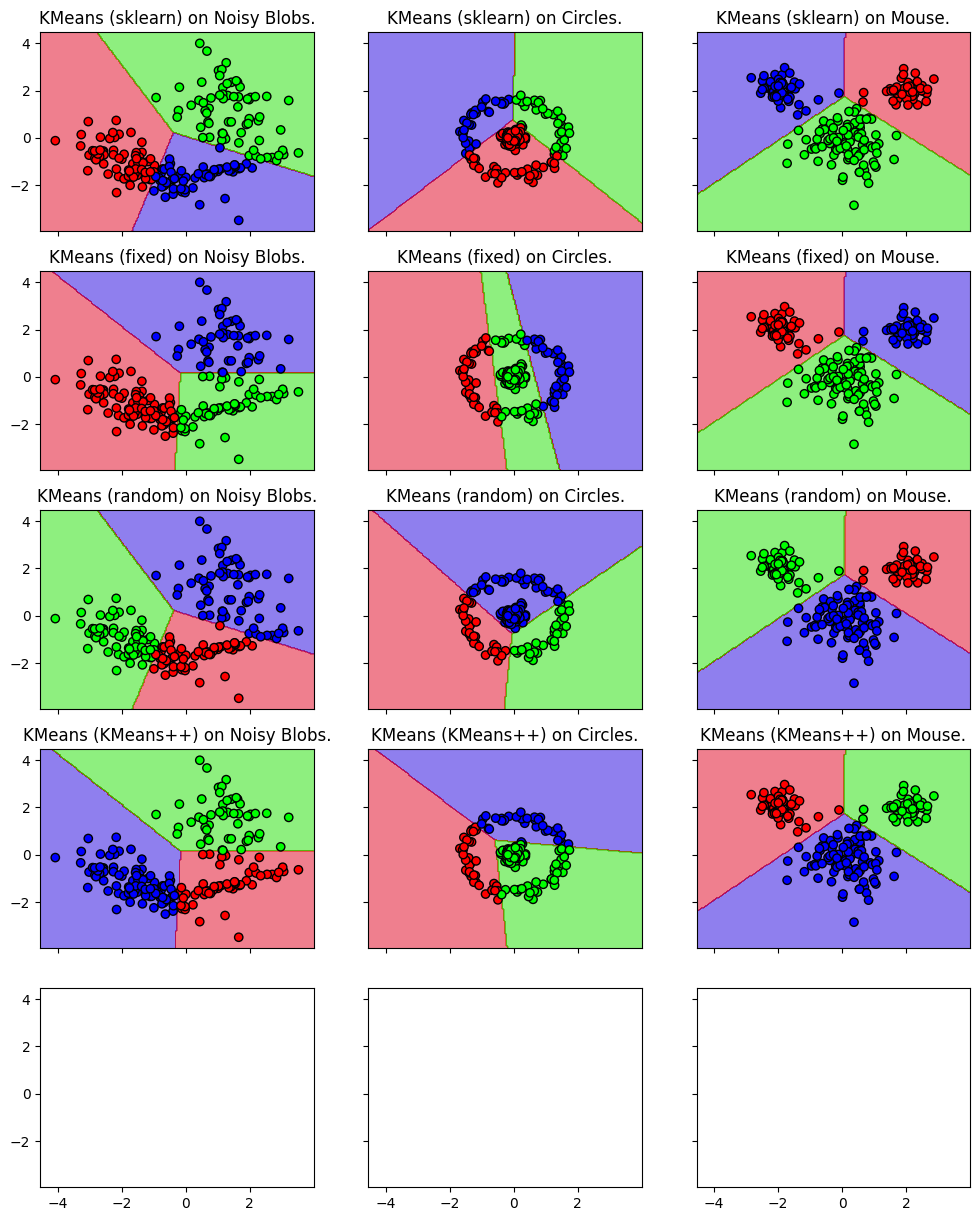

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.datasets import make_classification, make_circles, make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.base import BaseEstimator

def pairwise_sq_distance(X1, X2):
    return np.sum(X1**2, axis=1, keepdims=True) - 2*np.matmul(X1, X2.T) + np.sum(X2**2, axis=1, keepdims=True).T

def rbf_kernel(sigma=1):
    def kernel(X1, X2):
        return np.exp(-0.5*pairwise_sq_distance(X1, X2)/(sigma**2))
    return kernel


class K_Means(BaseEstimator):
    def __init__(self, k, initial_centroids='random', max_iter=300):
        super(K_Means, self).__init__()
        
        self.k = k
        self.initial_centroids = initial_centroids
        self.max_iter = max_iter
        
    def fit(self, X):
        n_samples, n_features = X.shape

        # Initialisierung der Zentren
        if isinstance(self.initial_centroids, str) and self.initial_centroids == 'random':
            rng = np.random.default_rng()
            indices = rng.choice(n_samples, size=self.k, replace=False)
            centroids = X[indices]
        elif isinstance(self.initial_centroids, str) and self.initial_centroids == 'KMeans++':
            centroids = np.empty((self.k, X.shape[1]))
            centroids[0,...] = X[np.random.choice(X.shape[0])]
            for i in range(1,self.k):
                dist = pairwise_sq_distance(X, centroids[:i])
                prob = np.min(dist, axis=1)
                prob = np.maximum(prob, 0)
                prob /= np.sum(prob)
                centroids[i, ...] = X[np.random.choice(X.shape[0], p=prob)]
        else:
            centroids = np.array(self.initial_centroids)

        for iteration in range(self.max_iter):
            # Schritt 1: Zugehörigkeiten berechnen (jeder Punkt zu dem nächstgelegenen Zentrum)
            distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
            assignments = np.argmin(distances, axis=1)

            # Schritt 2: Zentren aktualisieren
            new_centroids = np.array([
                X[assignments == j].mean(axis=0) if np.any(assignments == j) else centroids[j]
                for j in range(self.k)
            ])

            # Abbruchbedingung: Wenn sich die Zentren nicht mehr ändern
            if np.allclose(centroids, new_centroids):
                break

            centroids = new_centroids

        self.centroids_ = centroids
        self.labels_ = assignments
        return self
        
        
    def predict(self, X):
        # TODO: For each point in X, predict the cluster that it belongs to
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids_[np.newaxis, :, :], axis=2)
        assignments = np.argmin(distances, axis=1)
        return assignments
    
    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)
    
class Kernel_K_Means(BaseEstimator):
    def __init__(self, k, kernel_func, initial_assignment=None, max_iter=300):
        super(Kernel_K_Means, self).__init__()
        self.k = k
        self.kernel_func = kernel_func
        self.initial_assignment = initial_assignment
        self.max_iter = max_iter

    def fit(self, X):
        n = X.shape[0]
        K = self.kernel_func(X, X)

        if self.initial_assignment is None:
            rng = np.random.default_rng()
            assignments = rng.integers(self.k, size=n)
        else:
            assignments = np.array(self.initial_assignment[:n])

        for _ in range(self.max_iter):
            prev_assignments = assignments.copy()

            distances = np.zeros((n, self.k))
            for j in range(self.k):
                idx_j = np.where(assignments == j)[0]
                n_j = len(idx_j)
                if n_j == 0:
                    distances[:, j] = np.inf
                    continue
                K_ij = K[:, idx_j]
                K_jj = K[np.ix_(idx_j, idx_j)]

                term1 = np.diag(K)
                term2 = 2 * np.mean(K_ij, axis=1)
                term3 = np.mean(K_jj)

                distances[:, j] = term1 - term2 + term3

            assignments = np.argmin(distances, axis=1)
            if np.array_equal(assignments, prev_assignments):
                break

        self.labels_ = assignments
        self.X_fit_ = X
        self.K_fit_ = K
        self.cluster_info_ = []
        for j in range(self.k):
            idx_j = np.where(assignments == j)[0]
            n_j = len(idx_j)
            K_jj = K[np.ix_(idx_j, idx_j)]
            sum_Kjj = np.sum(K_jj)
            self.cluster_info_.append((idx_j, n_j, sum_Kjj))
        return self

    def predict(self, X_new):
        n_new = X_new.shape[0]
        X_train = self.X_fit_
        K_xx = self.kernel_func(X_new, X_new)
        K_xX = self.kernel_func(X_new, X_train)

        distances = np.zeros((n_new, self.k))

        for j, (idx_j, n_j, sum_Kjj) in enumerate(self.cluster_info_):
            if n_j == 0:
                distances[:, j] = np.inf
                continue
            K_xCj = K_xX[:, idx_j]

            term1 = np.diag(K_xx)
            term2 = 2 * np.mean(K_xCj, axis=1)
            term3 = sum_Kjj / (n_j ** 2)

            distances[:, j] = term1 - term2 + term3

        return np.argmin(distances, axis=1)

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_



# Generate toy data
def generate_data():
    n = 200
    n_classes = 3
    X, Y = make_classification(n, n_features=2, n_redundant=0, n_classes=n_classes, weights=(0.5, 0.3, 0.2),
                               class_sep=1.3, n_clusters_per_class=1, random_state=12345)
    yield ('Noisy Blobs', X)
    
    X, Y = make_circles(n, noise=0.08, factor=0.1, random_state=1234)
    yield ('Circles', X*1.6)
    
    X, Y = make_blobs([n//2, n//4, n//4], n_features=2, centers=[[0, 0], [-2, 2], [2, 2]],
                               cluster_std=[0.8, 0.35, 0.35], random_state=1234)
    yield ('Mouse', X)

datasets = list(generate_data())

initial_c = np.array([[ 1.57747042,  0.04248975],
                      [-1.38669281, -0.45473879],
                      [ 0.28039302, -0.2942349 ]])
initial_a = np.array([0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0,
                      2, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1,
                      1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0,
                      1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2,
                      1, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0,
                      2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2,
                      2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2,
                      1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 0])
clusterers = [('KMeans (sklearn)', KMeans(n_clusters=3, n_init=1, init='random')),
              ('KMeans (fixed)', K_Means(k=3, initial_centroids=initial_c)),
              ('KMeans (random)', K_Means(k=3, initial_centroids='random')),
              ('KMeans (KMeans++)', K_Means(k=3, initial_centroids='KMeans++')),
              
              ('Kernel KMeans (fixed)', Kernel_K_Means(k=3, kernel_func=rbf_kernel(sigma=0.75), initial_assignment=initial_a))
              # TODO: replace the above line with your own implementations, for example:
              # ('KMeans (fixed)', K_Means(k=3, initial_centroids=initial_c)),
             ]

# Plot decision surface
# First generate grid
res = 200  # Resolution of the grid in cells
x_max, y_max = np.max(np.stack([np.max(X, axis=0) for _, X in datasets]), axis=0)
x_min, y_min = np.min(np.stack([np.min(X, axis=0) for _, X in datasets]), axis=0)
x_min, x_max = x_min - (x_max - x_min) * 0.0625, x_max + (x_max - x_min) * 0.0625
y_min, y_max = y_min - (y_max - y_min) * 0.0625, y_max + (y_max - y_min) * 0.0625
grid_x, grid_y = np.meshgrid(np.linspace(x_min, x_max, res),
                             np.linspace(y_min, y_max, res))
# Get test array from grid
grid_input = np.c_[grid_x.reshape(-1), grid_y.reshape(-1)]

cmap = colors.ListedColormap([[0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 0.0]])
rows = len(clusterers)
columns = len(datasets)
fig, axes = plt.subplots(rows, columns, sharex=True, sharey=True, figsize=(12, 9/columns*rows), squeeze=False)
for (clu_name, clu), row_axes in zip(clusterers, axes):
    for (ds_name, X), ax in zip(datasets, row_axes):
        clusters = clu.fit_predict(X)
        if hasattr(clu, 'predict'):
            grid_out = clu.predict(grid_input).reshape(grid_x.shape)
            ax.contourf(grid_x, grid_y, grid_out%4, alpha=0.5, cmap=plt.cm.brg, vmin=0, vmax=2)
        ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

        ax.set_title(f'{clu_name:s} on {ds_name:s}.')
        ax.scatter(X[:, 0], X[:, 1], c=cmap(clusters%4), edgecolor='k')
fig.tight_layout()
plt.show()
plt.close(fig)

## 2. DBSCAN (MANDATORY)
*Density-based spatial clustering of applications with noise* (DBSCAN) is another algorithm for clustering data in a metric space (i.e., a space for which we can define a distance between two points). The philosophy behind this algorithm is quite different from $k$-means and/or any other algorithm that we have seen in machine learning up until now. Nevertheless, the algorithm is quite interesting and it makes a good case for the fact that machine learning methods are often not the only solution to a given problem.

DBSCAN operates on a metric space $(M, d)$, where $M$ is a set and $d\colon M \times M \to \mathbb{R}_0^+$ is a *distance function*. In our scenario, we want to choose $M = \mathbb{R}^m$ and $d(\mathbf{x}, \mathbf{x}') = \lVert \mathbf{x} - \mathbf{x}' \rVert$, but it would also be possible to choose $M$ as the set of all strings and $d$ as the Levenshtein distance, for example. The algorithm's behaviour is determined by 2 parameters: $\varepsilon \in \mathbb{R}^+$ and $\text{minpts} \in \mathbb{N}^+$. Given a dataset $D = \{\mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \ldots, \mathbf{x}^{(n)}\} \subseteq M$, this allows us to define the $\varepsilon$-neighbourhood of a point $\mathbf{x} \in D$ as
\begin{equation*}
    N_{\varepsilon}(\mathbf{x}) = \{\mathbf{x}' \in D \mid d(\mathbf{x}, \mathbf{x}') < \varepsilon\}
\end{equation*}
and we can assign each point in $D$ to one of the following three classes:
* $\mathbf{x}$ is a *core point* if $\lvert N_{\varepsilon}(\mathbf{x}) \rvert \geq \text{minpts}$.
* $\mathbf{x}$ is a *border point* if $\lvert N_{\varepsilon}(\mathbf{x}) \rvert < \text{minpts}$, but there exists a core point $\mathbf{x}' \in D$ with $\mathbf{x} \in N_{\varepsilon}(\mathbf{x}')$.
* Otherwise $\mathbf{x}$ is called a *noise point* or outlier.

We call $\mathbf{y} \in D$ *density reachable* from point $\mathbf{x} \in D$, if there exists a sequence of core points $\mathbf{x} = \mathbf{p}^{(0)}, \mathbf{p}^{(1)}, \ldots, \mathbf{p}^{(k)} \in D$ with $\mathbf{p}^{(i+1)} \in N_{\varepsilon}(\mathbf{p}^{(i)})$ for all $i \in \{0, 1, \ldots, k-1\}$ and $\mathbf{y} \in N_{\varepsilon}(\mathbf{p}^{(k)})$.

With these definitions in mind, the DBSCAN algorithm is quite easily explained:
1. Select a yet unlabeled core point $\mathbf{x}$ from the dataset $D$. It can be either randomly chosen from the remaining core points or according to some deterministic rule.
2. Assign $\mathbf{x}$ and every point that is density reachable from $\mathbf{x}$ to a new cluster $C$, unless it has already been assigned to a different cluster.
3. Repeat 1 and 2 until there are no unlabeled core points left. All points that don't belong to a cluster at this point are outliers.

The main work is hidden in step 2 and while we purposely don't give any specifics here to leave you with the freedom of implementing this in whatever way you want, it usually boils down to a connected-component search in the graph structure induced by the $\varepsilon$-neighbourhood relation.

Your tasks are now as follows:
1. Implement the DBSCAN algorithm in a class `DBSCAN`, in the same manner as the $k$-means algorithm in ex. 1. It should accept parameters $\varepsilon$ and $\text{minpts}$ as detailed above and use the euclidean distance. Note that it is not possible to assign new, unseen data points to one of the clusters that were found during training. Therefore, you don't have to implement the `predict(X)` method, but you should still return an assignment for the training data `X` (of shape `(N, d)`) when the method `fit_predict(X)` is called. In fact, this should return an array of size `N` containing the cluster that the point belongs to as an integer $c \in \{0, 1, \ldots, k-1\}$ if a total of $k$ clusters were found. If some point does not belong to a cluster (i.e., a noise point), it should be labeled with $-1$.

   **Note:** Please make sure to select unlabeled core points during step 1 of the algorithm in a deterministic manner. More specifically, you should always select the core point with the smallest index within the dataset. Please make sure not to shuffle the datasets before using DBSCAN on it to guarantee reproducible results.

2. Test the algorithm on the given datasets (same as in task 1) for varying values of $\varepsilon \in \{0.1, 0.5, 0.54, 0.75\}$, while keeping $\text{minpts} = 5$ fixed.

3. (**OPTIONAL**) Write a function that samples $n$ points uniformly at random from the inside of an ellipse in $\mathbb{R}^2$. Note that every ellipse in $\mathbb{R}^2$ can be parameterised by an invertible matrix $A \in \mathbb{R}^{2 \times 2}$ and $\mathbf{b} \in \mathbb{R}^2$ in the following way:
\begin{equation*}
    E := \{A\mathbf{x} + \mathbf{b} \mid \mathbf{x} \in \mathbb{R}^2, \lVert \mathbf{x} \rVert = 1\},
\end{equation*}
i.e., it is the image of the unit circle under the affine transformation induced by $A$ and $\mathbf{b}$. Therefore, your function should accept the following parameters:
    * `n`: the number of points to generate
    * `A` and `b`: The affine transformation that specifies the ellipse.
    * `random_state`: Either an instance of [`np.random.RandomState`](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState) or an integer that can be used as the seed for a `RandomState`. This should be used to return reproducible results.

   **Hint:** Think about how to sample points uniformly from an axis-aligned rectangle of size $(w, h)$ that is centered at the origin. What happens if the rectangle is rotated 45° counter-clockwise and its center is at $(3, 4)$ instead?


4. (**OPTIONAL**) Use the function from part 3 to create a dataset in which the clusters are easily recognizable to the human eye, but both DBSCAN (for any value of $\varepsilon$) and $k$-means (for the correct $k$) fail to find a good clustering.

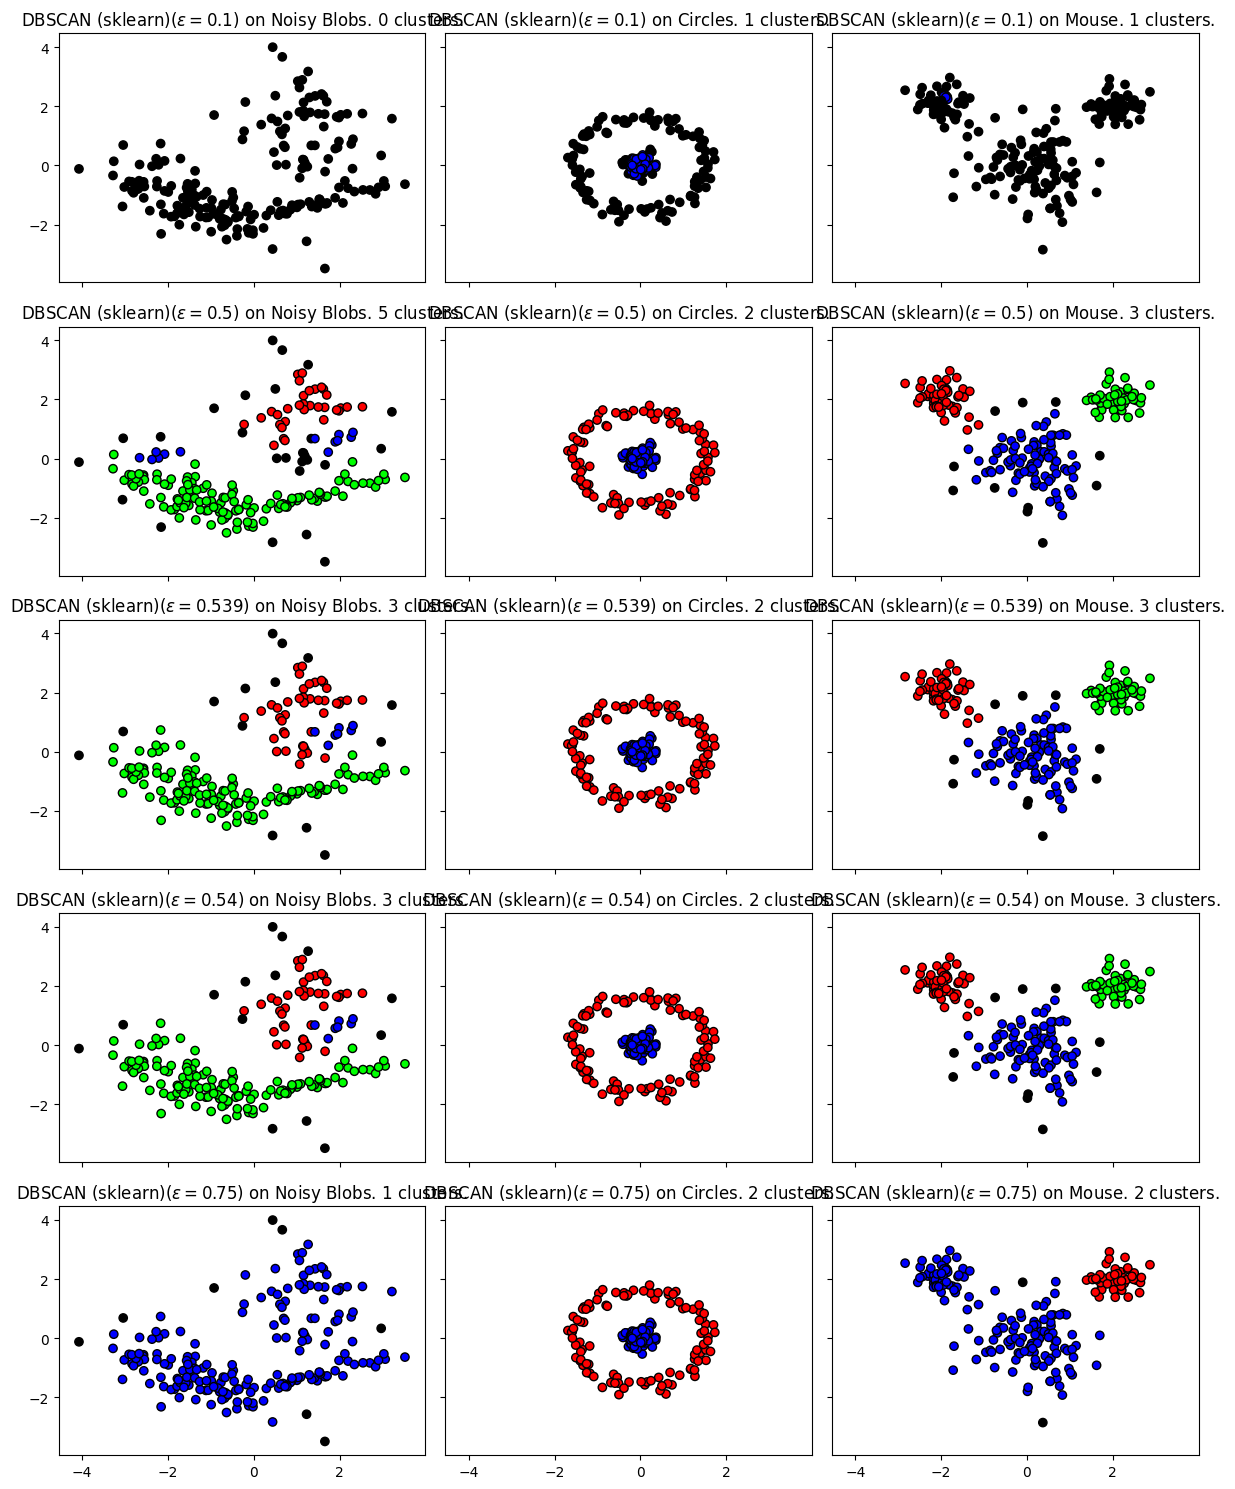

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.datasets import make_classification, make_blobs, make_circles
from sklearn.cluster import DBSCAN as sk_DBSCAN
from sklearn.base import BaseEstimator
from collections import deque

def pairwise_sq_distance(X1, X2):
    return np.sum(X1**2, axis=1, keepdims=True) - 2*np.matmul(X1, X2.T) + np.sum(X2**2, axis=1, keepdims=True).T


class DBSCAN(BaseEstimator):
    def __init__(self, eps=0.5, minpts=5):
        super(DBSCAN, self).__init__()
        
        self.eps = eps
        self.minpts = minpts
        self.assignment = None
        
    def fit(self, X):
        dist = pairwise_sq_distance(X, X)
        neighbours = [np.where(d < self.eps * self.eps)[0] for d in dist]
        
        self.assignment = np.full(X.shape[0], -1, dtype=int)  # -1 = Noise
        cluster = 0
        stack = deque()

        for p in range(X.shape[0]):
            # Skip if already assigned
            if self.assignment[p] != -1:
                continue
            
            # Check if core point
            if len(neighbours[p]) < self.minpts:
                continue  # Noise for now
            
            # Start a new cluster
            self.assignment[p] = cluster
            stack.extend(neighbours[p])

            while stack:
                n = stack.pop()
                if self.assignment[n] == -1:
                    self.assignment[n] = cluster
                    # Expand only if it's a core point
                    if len(neighbours[n]) >= self.minpts:
                        stack.extend(neighbours[n])
            
            cluster += 1

        
    def fit_predict(self, X):
        self.fit(X)
        return self.assignment


# Generate toy data
def generate_data():
    n = 200
    n_classes = 3
    X, Y = make_classification(n, n_features=2, n_redundant=0, n_classes=n_classes, weights=(0.5, 0.3, 0.2),
                               class_sep=1.3, n_clusters_per_class=1, random_state=12345)
    yield ('Noisy Blobs', X)
    
    X, Y = make_circles(n, noise=0.08, factor=0.1, random_state=1234)
    yield ('Circles', X*1.6)
    
    X, Y = make_blobs([n//2, n//4, n//4], n_features=2, centers=[[0, 0], [-2, 2], [2, 2]],
                               cluster_std=[0.8, 0.35, 0.35], random_state=1234)
    yield ('Mouse', X)
    
    # TODO: use ellipse_uniform to create a dataset that breaks DBSCAN and KMeans
    # and return (yield) it here

datasets = list(generate_data())

clusterers = [('DBSCAN (sklearn)', DBSCAN)]  # TODO: replace this with your own implementation
params = [{'eps': eps, 'minpts': 5} for eps in [0.1, 0.5, 0.539, 0.54, 0.75]]
clusterers = [(name + f'($\\varepsilon = {param["eps"]}$)', cl(**param)) for name, cl in clusterers for param in params]
# Plot decision surface
# First generate grid
res = 200  # Resolution of the grid in cells
x_max, y_max = np.max(np.stack([np.max(X, axis=0) for _, X in datasets]), axis=0)
x_min, y_min = np.min(np.stack([np.min(X, axis=0) for _, X in datasets]), axis=0)
x_min, x_max = x_min - (x_max - x_min) * 0.0625, x_max + (x_max - x_min) * 0.0625
y_min, y_max = y_min - (y_max - y_min) * 0.0625, y_max + (y_max - y_min) * 0.0625
grid_x, grid_y = np.meshgrid(np.linspace(x_min, x_max, res),
                             np.linspace(y_min, y_max, res))
# Get test array from grid
grid_input = np.c_[grid_x.reshape(-1), grid_y.reshape(-1)]

cmap = colors.ListedColormap([[0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 0.0]])
rows = len(clusterers)
columns = len(datasets)
fig, axes = plt.subplots(rows, columns, sharex=True, sharey=True, figsize=(12, 9/columns*rows), squeeze=False)
for (clu_name, clu), row_axes in zip(clusterers, axes):
    for (ds_name, X), ax in zip(datasets, row_axes):
        clusters = clu.fit_predict(X)
        if hasattr(clu, 'predict'):
            grid_out = clu.predict(grid_input).reshape(grid_x.shape)
            ax.contourf(grid_x, grid_y, grid_out, alpha=0.5, cmap=plt.cm.brg, vmin=0, vmax=2)
        ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

        ax.set_title(f'{clu_name:s} on {ds_name:s}. {np.max(clusters)+1:d} clusters.')
        ax.scatter(X[:, 0], X[:, 1], c=cmap(clusters%4), edgecolor='k')
fig.tight_layout()
plt.show()
plt.close(fig)